## Final Project Submission

Please fill out:
* Student name: Abdihakim S Mohamed
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: Maryan Mwikali
* Blog post URL:


## OVERVIEW
In this project, I will provide recommendations to Microsoft on the types of movies they should produce for the
launch of their movie studio. To make these suggestions, I will analyze historical data from IMDB, Box Office Mojo, and
The Numbers. Specifically, I will focus on the genre of movies that perform well at the box office and perform well in both Domestic and Foreign market.

Measuring the success of a movie can be done through various metrics, but in this project, I will primarily focus on financial metrics that can be objectively measured, such as movie gross and Genre. By identifying common attributes among the top-grossing movies, we can offer valuable insights on the type of film Microsoft should pursue.

Additionally, I will explore the relationship between genre, ratings, and movie gross . 



## 1.0 Importing Modules


In [1]:
# For cleaning, transforming, and reshaping raw data to make it more suitable for analysis and modeling
import pandas as pd

#For Numerical operations and arrays
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# seaborn and matplotlib for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1 Loading the Data

In [2]:
#Loading the data set fro the zippedData using panda module
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


The movie_gross data has 3387 rows and 5 columns.

In [3]:
#Loading the data from the zippedData using panda module
movie_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
movie_title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


The data title_rating has 73856 rows and 3 columns. 

In [4]:
#Loading the data using panda module
movie_title_basic = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
movie_title_basic

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [5]:
movie_budgets =pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


The data has 146144 rows and 6 columns. This data has more rows and less columns.

## 2.0 Data Understanding

In [6]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In this data set the studio, domestic_gross and foreign_gross has missing values which will require handling or analysis.

In [7]:
movie_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The data set is fully populated with no missing values, ensuring that all variables in the data set have non-null values and there are no gaps or missing values in any of the columns. 

In [8]:
movie_title_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In this data set the genres column has some entries with missing values.

## 2.1 Merging the data set

The two data frames movie_title_ratings and movie_title_basic, share a common column called tconst. By utilizing this column, we can streamline our analysis by merging the data into a single dataframe instead of cross-referencing between the two datasets. I will achieve this by using the pd.merge method.

In [9]:
# Merging the data using pd.merge
movie_ratings = pd.merge(movie_title_ratings, movie_title_basic)
movie_ratings.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [10]:
movie_ratings.shape

(73856, 8)

In [11]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


To facilitate the analysis of the datasets, I am consolidating the three datasets into a single dataframe. In the process, I am merging the alraedy combined file with the movie_title_gross dataset using the 'primary_title' column, which corresponds to the 'title' column in the movie_title_gross dataset. This  will allow for easier comparison and examination of the data.

In [12]:
combined_ratings_gross = movie_ratings.merge(movie_gross, left_on = 'primary_title', right_on = 'title')
combined_ratings_gross.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",The Legend of Hercules,LG/S,18800000.0,42400000,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,Baggage Claim,FoxS,21600000.0,887000,2013
2,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",Jack and the Cuckoo-Clock Heart,Shout!,NaN,3400000,2014
3,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Moneyball,Sony,75600000.0,34600000,2011
4,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",Hereafter,WB,32700000.0,72500000,2010


In [13]:
#cheking for the last 5 rows
combined_ratings_gross.tail()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
3022,tt3399916,6.3,4185,The Dead Lands,The Dead Lands,2014,107.0,"Action,Adventure",The Dead Lands,Magn.,5200.0,NaN,2015
3023,tt3616916,6.7,28167,The Wave,Bølgen,2015,105.0,"Action,Drama,Thriller",The Wave,Magn.,177000.0,NaN,2016
3024,tt3748512,7.4,4977,Hitchcock/Truffaut,Hitchcock/Truffaut,2015,79.0,Documentary,Hitchcock/Truffaut,Cohen,260000.0,NaN,2015
3025,tt7008872,7.0,18768,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",Boy Erased,Focus,6800000.0,5000000,2018
3026,tt7048622,7.7,11168,The Insult,L'insulte,2017,113.0,"Crime,Drama,Thriller",The Insult,Cohen,1000000.0,NaN,2018


In [14]:
combined_ratings_gross.columns

Index(['tconst', 'averagerating', 'numvotes', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres', 'title',
       'studio', 'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

# 2.2 Reveiwing the DataFrame

In [15]:
#checking for the number of rows and columns
combined_ratings_gross.shape

(3027, 13)

In [16]:
#checking for the info of the dataframe
combined_ratings_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   averagerating    3027 non-null   float64
 2   numvotes         3027 non-null   int64  
 3   primary_title    3027 non-null   object 
 4   original_title   3027 non-null   object 
 5   start_year       3027 non-null   int64  
 6   runtime_minutes  2980 non-null   float64
 7   genres           3020 non-null   object 
 8   title            3027 non-null   object 
 9   studio           3024 non-null   object 
 10  domestic_gross   3005 non-null   float64
 11  foreign_gross    1832 non-null   object 
 12  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 331.1+ KB


There are several columns in the dataset that contain missing values, 'runtime_minutes', 'genres', 'studio', 'domestics_gross' and 'foreign_gross'. Among these columns, the 'genre' column is particularly important as it will play a crucial role in determining the type of movies that Microsoft should focus on. Since we cannot accurately guess the genre of a movie, removing the null values in this column will allow us to streamline our analysis and make more infomed decisions. While studio column is less influential in our final analysis and its missing values will have minimal impact on our decision-making perocess.

Also the foreign_gross column variables is capturered as object, this will not allow us to any mathematical operations therefore we have to convert it to a float so as to allow us mathematical calculations and further analysis.

In [17]:
# converting the foreign_gross column to float
combined_ratings_gross['foreign_gross'] = pd.to_numeric(combined_ratings_gross['foreign_gross'], errors = 'ignore')
combined_ratings_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   averagerating    3027 non-null   float64
 2   numvotes         3027 non-null   int64  
 3   primary_title    3027 non-null   object 
 4   original_title   3027 non-null   object 
 5   start_year       3027 non-null   int64  
 6   runtime_minutes  2980 non-null   float64
 7   genres           3020 non-null   object 
 8   title            3027 non-null   object 
 9   studio           3024 non-null   object 
 10  domestic_gross   3005 non-null   float64
 11  foreign_gross    1832 non-null   object 
 12  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 331.1+ KB


## 2.3 Data Cleaning 

In [18]:
# Dropping unnecessary columns that will have a less impact in our analysis
combined_ratings_gross_1 = combined_ratings_gross.drop(['runtime_minutes', 'studio', 'original_title', 'year', 'primary_title', 'tconst'], axis = 1)
combined_ratings_gross_1.head()

,averagerating,numvotes,start_year,genres,title,domestic_gross,foreign_gross
0,4.2,50352,2014,"Action,Adventure,Fantasy",The Legend of Hercules,18800000.0,42400000
1,5.1,8296,2013,Comedy,Baggage Claim,21600000.0,887000
2,7.0,5494,2013,"Adventure,Animation,Drama",Jack and the Cuckoo-Clock Heart,NaN,3400000
3,7.6,326657,2011,"Biography,Drama,Sport",Moneyball,75600000.0,34600000
4,6.5,87288,2010,"Drama,Fantasy,Romance",Hereafter,32700000.0,72500000


In [19]:
#checking for duplicate data
duplicate_rows = combined_ratings_gross.duplicated()
print (duplicate_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
3022    False
3023    False
3024    False
3025    False
3026    False
Length: 3027, dtype: bool


Our combined data does not have a duplicate rows

In [20]:
#Checking for missing values
combined_ratings_gross_1.isna().sum()

averagerating        0
numvotes             0
start_year           0
genres               7
title                0
domestic_gross      22
foreign_gross     1195
dtype: int64

In [21]:
#getting the percentages of the missing values 
proportion_of_missing = combined_ratings_gross_1.isna().sum()*100/len(combined_ratings_gross_1)
proportion_of_missing

averagerating      0.000000
numvotes           0.000000
start_year         0.000000
genres             0.231252
title              0.000000
domestic_gross     0.726792
foreign_gross     39.478031
dtype: float64

With the exception of 'foreign gross', the missing values in the dataset account for only 1% of the total data. Therefore, we can safely drop these rows with missing values at this point.

In [22]:
#Dropping the rows with missing values
combined_ratings_gross_2 = combined_ratings_gross_1.dropna(axis=0)
combined_ratings_gross_2.head()

,averagerating,numvotes,start_year,genres,title,domestic_gross,foreign_gross
0,4.2,50352,2014,"Action,Adventure,Fantasy",The Legend of Hercules,18800000.0,42400000
1,5.1,8296,2013,Comedy,Baggage Claim,21600000.0,887000
3,7.6,326657,2011,"Biography,Drama,Sport",Moneyball,75600000.0,34600000
4,6.5,87288,2010,"Drama,Fantasy,Romance",Hereafter,32700000.0,72500000
5,7.4,428142,2011,"Action,Adventure,Thriller",Mission: Impossible - Ghost Protocol,209400000.0,485300000


In [23]:
combined_ratings_gross_2.isna().sum()

averagerating     0
numvotes          0
start_year        0
genres            0
title             0
domestic_gross    0
foreign_gross     0
dtype: int64

In [24]:
combined_ratings_gross_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1803 entries, 0 to 3025
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   averagerating   1803 non-null   float64
 1   numvotes        1803 non-null   int64  
 2   start_year      1803 non-null   int64  
 3   genres          1803 non-null   object 
 4   title           1803 non-null   object 
 5   domestic_gross  1803 non-null   float64
 6   foreign_gross   1803 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 112.7+ KB


In [25]:
combined_ratings_gross_2.head()

,averagerating,numvotes,start_year,genres,title,domestic_gross,foreign_gross
0,4.2,50352,2014,"Action,Adventure,Fantasy",The Legend of Hercules,18800000.0,42400000
1,5.1,8296,2013,Comedy,Baggage Claim,21600000.0,887000
3,7.6,326657,2011,"Biography,Drama,Sport",Moneyball,75600000.0,34600000
4,6.5,87288,2010,"Drama,Fantasy,Romance",Hereafter,32700000.0,72500000
5,7.4,428142,2011,"Action,Adventure,Thriller",Mission: Impossible - Ghost Protocol,209400000.0,485300000


In [26]:
#Removing the commas in the specific column called foreign_gross
combined_ratings_gross_2.loc[:, 'foreign_gross'] = combined_ratings_gross_2['foreign_gross'].str.replace(',', '')


In [27]:
#converting the foreign_gross column to integer
combined_ratings_gross_2['foreign_gross'] = combined_ratings_gross_2['foreign_gross'].astype(float)
combined_ratings_gross_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1803 entries, 0 to 3025
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   averagerating   1803 non-null   float64
 1   numvotes        1803 non-null   int64  
 2   start_year      1803 non-null   int64  
 3   genres          1803 non-null   object 
 4   title           1803 non-null   object 
 5   domestic_gross  1803 non-null   float64
 6   foreign_gross   1803 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 112.7+ KB


In [28]:
combined_ratings_gross_2.head(30)

,averagerating,numvotes,start_year,genres,title,domestic_gross,foreign_gross
0,4.2,50352,2014,"Action,Adventure,Fantasy",The Legend of Hercules,18800000.0,42400000.0
1,5.1,8296,2013,Comedy,Baggage Claim,21600000.0,887000.0
3,7.6,326657,2011,"Biography,Drama,Sport",Moneyball,75600000.0,34600000.0
4,6.5,87288,2010,"Drama,Fantasy,Romance",Hereafter,32700000.0,72500000.0
5,7.4,428142,2011,"Action,Adventure,Thriller",Mission: Impossible - Ghost Protocol,209400000.0,485300000.0
6,7.2,477771,2012,"Action,Comedy,Crime",21 Jump Street,138400000.0,63100000.0
7,5.4,54646,2015,"Comedy,Drama,Romance",Aloha,21100000.0,5200000.0
8,4.4,69199,2010,"Comedy,Drama,Romance",Sex and the City 2,95300000.0,193000000.0
9,5.6,44490,2010,"Fantasy,Horror,Thriller",Don't Be Afraid of the Dark,24000000.0,12900000.0
10,6.2,18431,2010,"Comedy,Crime,History",Burke and Hare,4800.0,4300000.0


In [29]:
# Generating descriptive statistics for a DataFrame
combined_ratings_gross_2.describe()

,averagerating,numvotes,start_year,domestic_gross,foreign_gross
count,1803.000000,1.803000e+03,1803.000000,1.803000e+03,1.803000e+03
mean,6.451636,9.498572e+04,2013.557404,4.971950e+07,7.911398e+07
std,1.010874,1.529625e+05,2.622875,8.047399e+07,1.394153e+08
min,1.600000,5.000000e+00,2010.000000,4.000000e+02,6.000000e+02
25%,5.900000,5.508500e+03,2011.000000,1.300000e+06,4.800000e+06
50%,6.500000,3.863700e+04,2013.000000,2.080000e+07,2.130000e+07
75%,7.200000,1.144775e+05,2016.000000,6.155000e+07,8.215000e+07
max,9.200000,1.841066e+06,2019.000000,7.001000e+08,9.464000e+08


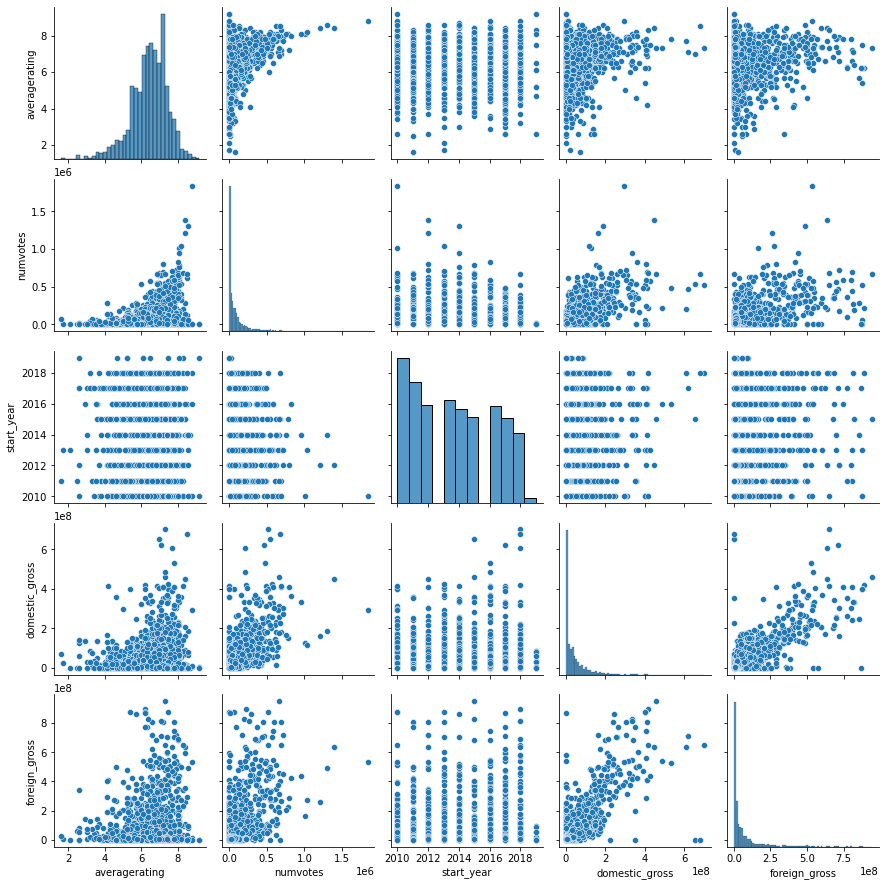

In [30]:

numerical_df = combined_ratings_gross_2;
sns.pairplot(numerical_df)

By examining the scatter plots, I can identify potential correlations between numerical variables. Positive correlations appear as upward-sloping patterns, while negative correlations appear as downward-sloping patterns. The histograms along the diagonal cells show the distribution of each numerical variable. By Understanding the distribution of each variable it can provide insights into its central tendency and spread.

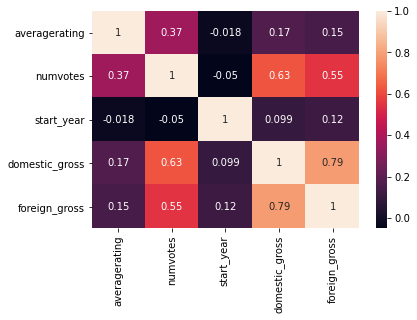

In [31]:
sns.heatmap(numerical_df.corr(), annot=True);
plt.show()

- The heatmap analysis reveals a positive correlation between "domestic_gross" and "foreign_gross," indicating that movies with higher domestic box office earnings also tend to have higher foreign box office earnings. This suggests that movies performing well in the domestic market may have a good chance of achieving success in the foreign market as well.
- Another noteworthy observation is the positive correlation between "numvotes" (number of votes) and "averagerating" (average rating). This implies that movies with a higher number of votes often receive higher average ratings. This correlation suggests that popular movies are likely to be well-received by the audience, leading to increased engagement and participation from viewers.
- Additionally, a weak positive correlation exists between "domestic_gross" and "numvotes," indicating that movies with more votes may also experience slightly higher domestic box office earnings. This finding suggests that audience engagement and popularity can have a positive impact on a movie's financial success in the domestic market.

These statistics provide an overview of the central tendency, spread, and distribution of the data in each column. For example, we can see that the average rating is around 6.45, with a minimum of 1.6 and a maximum of 9.2. Similarly, the number of votes has a mean of approximately 94,985, with a minimum of 5 and a maximum of 1,841,066. The same trend follows for the other columns.

## 3.0 Data Visualization

### 3.1 Movies Released per Year

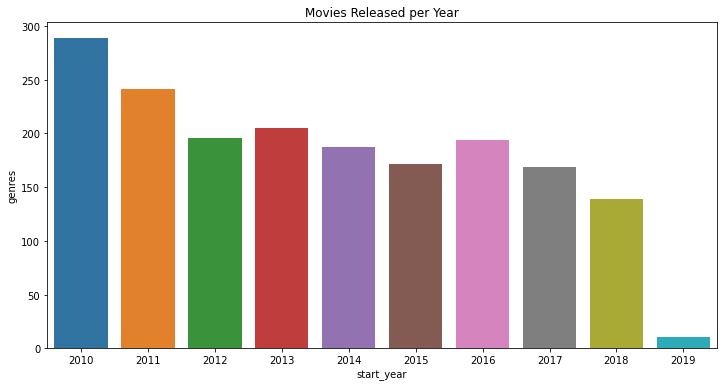

In [32]:
# Number of movies released per year
plt.figure(figsize=(12,6))
sns.countplot(x='start_year',data=combined_ratings_gross_2,)
plt.ylabel('genres')
plt.title ("Movies Released per Year")
plt.show()

The count plot illustrates a consistent rise in the number of movie releases from 2010 to 2013, with a peak in 2013. Subsequently, there was a minor decrease in movie releases until 2016, followed by a gradual upswing in more recent years. Notably, 2019 recorded the lowest count of movie releases in the dataset, suggesting a potential shift or change in the movie industry during that particular year.

In [33]:
grouped_by_genre_foreign = combined_ratings_gross_2.groupby(['genres', 'foreign_gross']).size().reset_index(name='count')
grouped_by_genre_foreign

,genres,foreign_gross,count
0,Action,2500000.0,1
1,Action,3300000.0,1
2,Action,4099999.0,1
3,Action,4800000.0,1
4,Action,5300000.0,1
...,...,...,...
1738,Thriller,88800000.0,1
1739,Thriller,108600000.0,1
1740,Thriller,185700000.0,1
1741,Thriller,197100000.0,1


In [34]:
grouped_by_genre_Domestic = combined_ratings_gross_2.groupby(['genres', 'domestic_gross']).size().reset_index(name='count')
grouped_by_genre_Domestic

,genres,domestic_gross,count
0,Action,2500.0,1
1,Action,17500.0,1
2,Action,134000.0,1
3,Action,251000.0,1
4,Action,476000.0,1
...,...,...,...
1755,Thriller,51900000.0,1
1756,Thriller,89100000.0,1
1757,Thriller,90400000.0,1
1758,Thriller,128000000.0,1


In [35]:
top_10_genres_dom = combined_ratings_gross_2.nlargest(10,'domestic_gross')[['genres','domestic_gross']]\
.set_index('genres')
top_10_genres_dom

,domestic_gross
genres,
"Action,Adventure,Sci-Fi",700100000.0
"Action,Adventure,Sci-Fi",678800000.0
"Action,Adventure,Sci-Fi",652300000.0
"Action,Adventure,Fantasy",620200000.0
"Action,Adventure,Animation",608600000.0
"Action,Adventure,Sci-Fi",532200000.0
"Adventure,Animation,Comedy",486300000.0
"Action,Adventure,Sci-Fi",459000000.0
"Action,Thriller",448100000.0


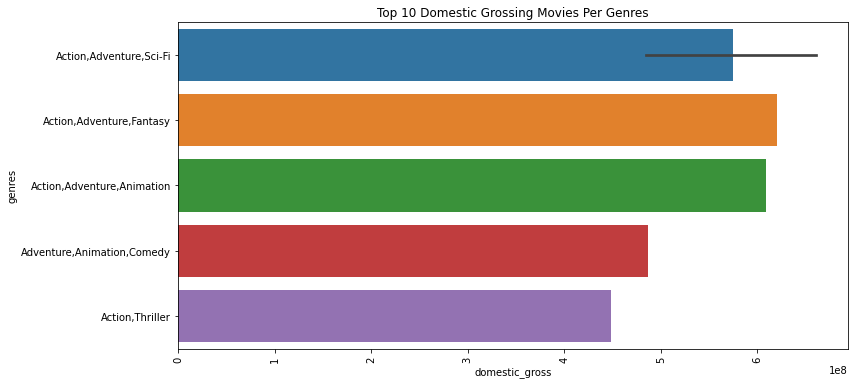

In [36]:
#Ploting of top 10 Domestic grossing movies per genres
plt.figure(figsize=(12, 6))
sns.barplot(x="domestic_gross",y=top_10_genres_dom.index,data=top_10_genres_dom)
plt.title('Top 10 Domestic Grossing Movies Per Genres')
plt.xticks(rotation=90)
plt.show()

The bar plot displays the performance of different genres in terms of domestic box office earnings. It shows which genres have the highest total domestic gross earnings for their top 10 movies. Action, Adventure, and Sci-Fi genres have the highest total domestic gross earnings for their top 10 movies. These genres are popular among domestic audiences and tend to generate substantial revenues in the US market. The bar heights for each genre vary, indicating that not all genres have the same level of success in the domestic market. Some genres perform better than others, and Microsoft's movie studio should consider investing more in genres that have demonstrated strong performance domestically.

In [37]:
#Completed 
top_10_genres_for = combined_ratings_gross_2.nlargest(10,'foreign_gross')[['genres','foreign_gross']]\
.set_index('genres')
top_10_genres_for

,foreign_gross
genres,
"Action,Adventure,Sci-Fi",946400000.0
"Action,Adventure,Sci-Fi",891800000.0
"Adventure,Drama,Sport",875700000.0
"Fantasy,Romance",875700000.0
"Adventure,Animation,Comedy",875700000.0
"Action,Drama,Thriller",867600000.0
"Action,Adventure,Sci-Fi",858600000.0
"Adventure,Animation,Comedy",823400000.0
"Action,Adventure,Fantasy",812700000.0


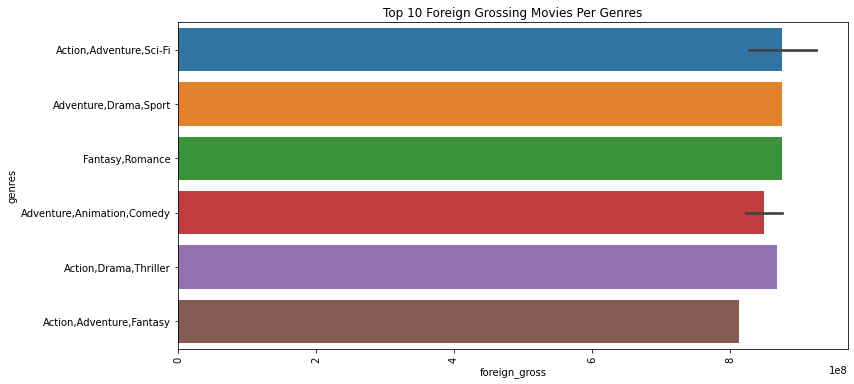

In [38]:
#Ploting of Top 10 Foreign grossing movies per genre
plt.figure(figsize=(12, 6))
sns.barplot(x="foreign_gross",y=top_10_genres_for.index,data=top_10_genres_for)
plt.title('Top 10 Foreign Grossing Movies Per Genres')
plt.xticks(rotation=90)
plt.show()

The bar plot displays the performance of different genres in terms of foreign box office earnings. It shows which genres have the highest total foreign gross earnings for their top 10 movies. Action, Adventure, and Sci-Fi genres have the highest total foreign gross earnings for their top 10 movies. These genres are popular among international audiences and tend to generate substantial revenues in foreign markets.The bar heights for each genre vary, indicating that not all genres have the same level of success in foreign markets. Some genres perform better than others, and Microsoft's movie studio should consider investing more in genres that have demonstrated strong performance internationally.

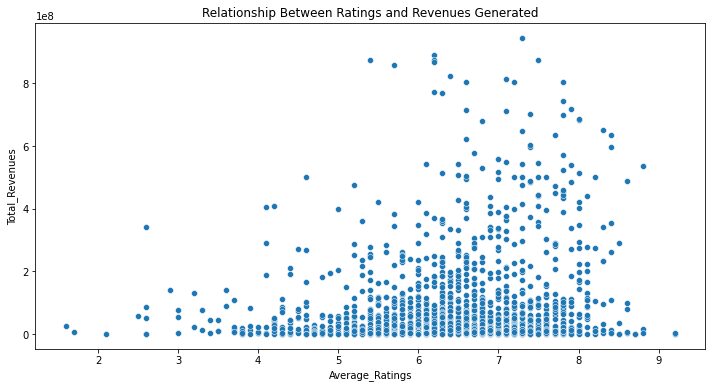

In [39]:
#Plotting a scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(x='averagerating', y='foreign_gross', data=combined_ratings_gross_2)
plt.xlabel('Average_Ratings')
plt.ylabel('Total_Revenues')
plt.title("Relationship Between Ratings and Revenues Generated")
plt.show()

This scatter plot analysis reveals that there is no direct linear relationship between average ratings and foreign gross revenues. While higher-rated movies might have the potential for better international reception, it is crucial for Microsoft's movie studio to adopt a well-rounded approach that considers multiple factors to produce commercially successful movies in foreign markets.

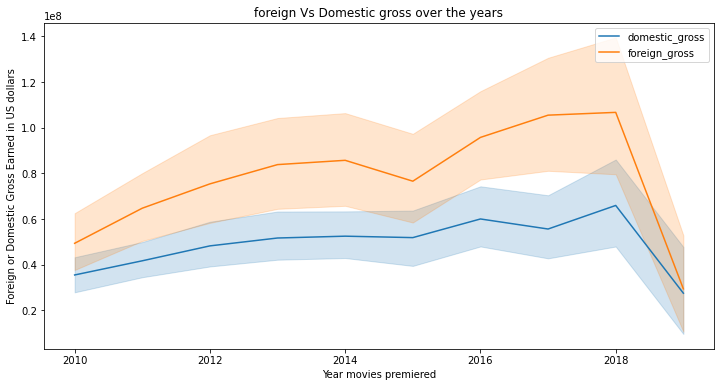

In [40]:
# PLoting a lineplot
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=combined_ratings_gross_2 , x='start_year', y='domestic_gross', label='domestic_gross' ,ax=ax)
sns.lineplot(data=combined_ratings_gross_2 , x='start_year', y='foreign_gross',label='foreign_gross',ax=ax)
ax.set_xlabel("Year movies premiered")
ax.set_ylabel("Foreign or Domestic Gross Earned in US dollars")
ax.set_title("foreign Vs Domestic gross over the years");

The line plot shows the trends of domestic and foreign gross earnings over the years. Both lines fluctuate over time, indicating variations in box office performance from year to year. The domestic gross line shows some fluctuations and changes in slope over the years. This suggests that domestic box office revenues for movies vary over time, with some years showing higher earnings and others lower.In contrast, the foreign gross line generally exhibits a steady upward trend over the years. This indicates that foreign box office revenues have been increasing over time, pointing to a growing international market for movies.There is a considerable gap between the domestic and foreign gross lines. Foreign gross earnings are consistently higher than domestic gross earnings, indicating that movies tend to perform better in international markets than in the domestic US market.


## 4.0 Conclusion

1. The dataset analysis provided valuable insights into the movie industry's performance over the years. The domestic and foreign gross earnings exhibited different trends, with the foreign gross consistently showing an upward trajectory, while the domestic gross experienced fluctuations.


2. The genre analysis highlighted the strong performance of Action, Adventure, and Sci-Fi genres in both domestic and foreign markets, indicating their popularity and profitability. These genres are promising investment options for Microsoft Studio in its movie production ventures.


3. Furthermore, the scatter plots were instrumental in identifying potential correlations between numerical variables, enabling data-driven decision-making for Microsoft Studio's movie production strategy. Positive correlations indicated upward trends, while negative correlations indicated downward trends, allowing the studio to tailor its approach to maximize returns.

## 5.0 Reccomendation

1. Given the exceptional success of genres like Action, Adventure, and Sci-Fi in both domestic and international markets, Microsoft Studio should prioritize investments in producing more movies within these genres to optimize revenue generation.


2. As foreign gross earnings demonstrate a consistent upward trend, Microsoft should continue to target and expand its presence in international markets. Tailoring movies to resonate with diverse global audiences can enhance the studio's global appeal and boost earnings.


3.  Analyzing the trends in domestic and foreign gross earnings equips Microsoft Studio with valuable market intelligence. By responding to evolving audience preferences and market dynamics, the studio can proactively adjust its movie production approach to remain competitive in the dynamic film industry.